### COVID-19 Case Exploratory Data Analysis

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading Data
df=pd.read_csv("C:\\Git & GitHub\\Projects\\Covid-19 Case Analysis\\covid_india_uncleaned.csv")
df.head()

,Date,State,Confirmed,Recovered,Deceased
0,2020-03-01,Maharashtra,788,584.0,0
1,2020-03-02,Maharashtra,1006,653.0,0
2,2020-03-03,Maharashtra,1768,906.0,0
3,2020-03-04,Maharashtra,2264,930.0,0
4,2020-03-05,Maharashtra,2791,1072.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4812 non-null   object 
 1   State      4817 non-null   object 
 2   Confirmed  4870 non-null   object 
 3   Recovered  4779 non-null   float64
 4   Deceased   4870 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 190.4+ KB


In [5]:
df.isnull().sum()                 # Checking columns with null values

Date         58
State        53
Confirmed     0
Recovered    91
Deceased      0
dtype: int64

In [6]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # convert 'N/A' to NaT
df = df.dropna(subset=['Date'])  # remove rows with invalid dates

df = df.dropna(subset=['State']) # Drop rows with missing or invalid State names

# Convert to numeric 
df['Confirmed'] = pd.to_numeric(df['Confirmed'], errors='coerce')
df['Recovered'] = pd.to_numeric(df['Recovered'], errors='coerce')
df['Deceased'] = pd.to_numeric(df['Deceased'], errors='coerce')

# Replace negative or missing values with 0 
df[['Confirmed', 'Recovered', 'Deceased']] = df[['Confirmed', 'Recovered', 'Deceased']].fillna(0)
df.loc[df['Deceased'] < 0, 'Deceased'] = 0


In [7]:
df['Active'] = df['Confirmed'] - df['Recovered'] - df['Deceased']   #Adding active cases

df = df.sort_values(['State', 'Date'])
df['Daily New'] = df.groupby('State')['Confirmed'].diff().fillna(0)

df['7-Day Avg'] = df.groupby('State')['Daily New'].transform(lambda x: x.rolling(7).mean())    # 7-days average




In [8]:
state = 'Maharashtra'
state_df = df[df['State'] == state]


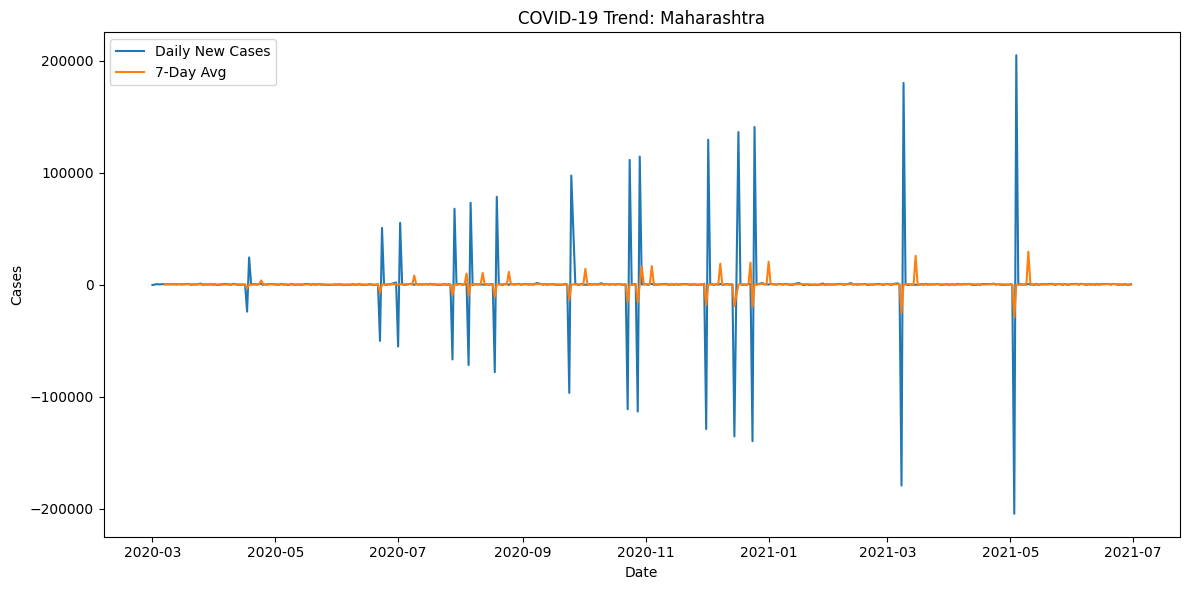

In [9]:
plt.figure(figsize=(12,6))
sns.lineplot(data=state_df, x='Date', y='Daily New', label='Daily New Cases')
sns.lineplot(data=state_df, x='Date', y='7-Day Avg', label='7-Day Avg')
plt.title(f"COVID-19 Trend: {state}")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\thegr\AppData\Local\Temp\ipykernel_22212\2473716181.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, x='Confirmed', y='State', palette='viridis')


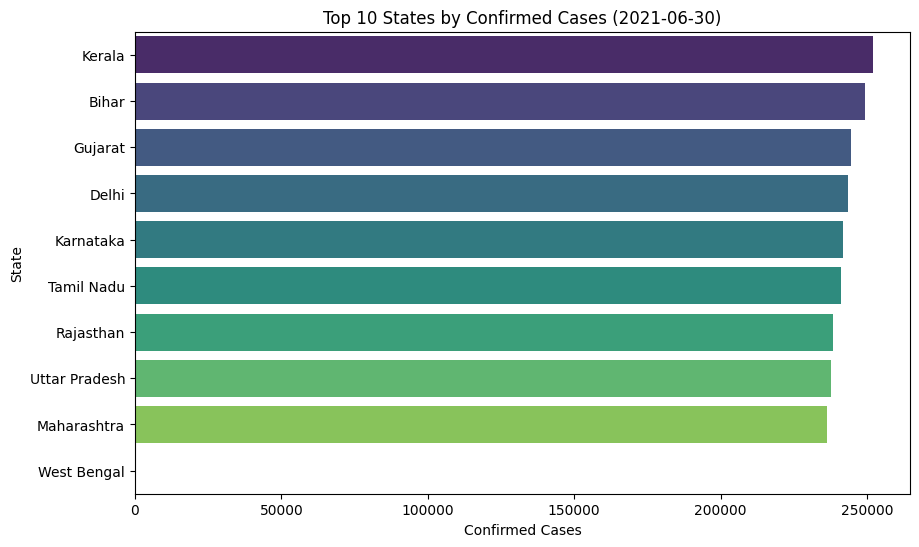

In [10]:
latest_date = df['Date'].max()
latest_df = df[df['Date'] == latest_date]
top_states = latest_df.sort_values(by='Confirmed', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_states, x='Confirmed', y='State', palette='viridis')
plt.title(f"Top 10 States by Confirmed Cases ({latest_date.date()})")
plt.xlabel("Confirmed Cases")
plt.ylabel("State")
plt.show()


In [13]:
latest_df = df[df['Date'] == df['Date'].max()].copy()

latest_df['Recovery Rate'] = (latest_df['Recovered'] / latest_df['Confirmed']) * 100
latest_df['Death Rate'] = (latest_df['Deceased'] / latest_df['Confirmed']) * 100



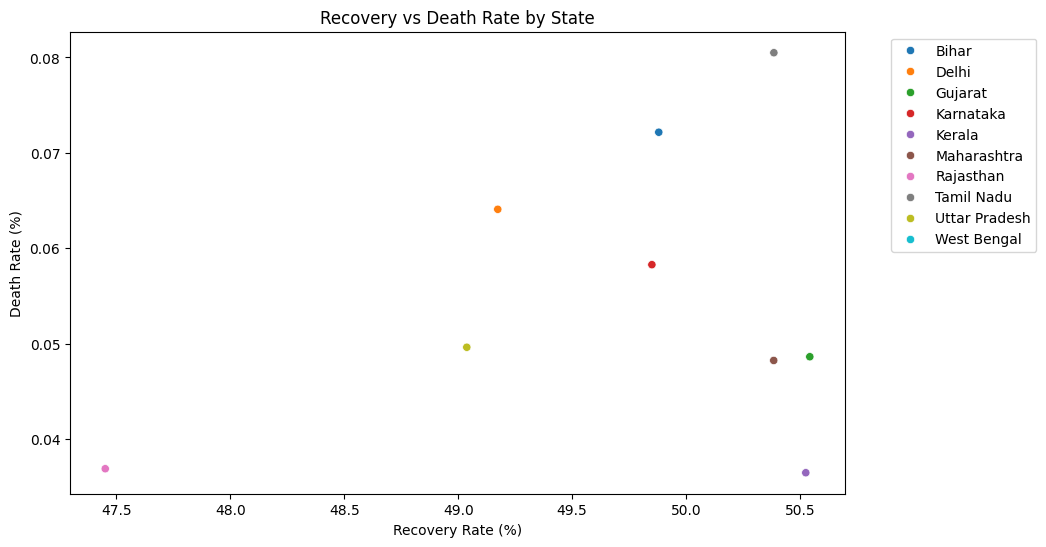

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=latest_df, x='Recovery Rate', y='Death Rate', hue='State')
plt.title("Recovery vs Death Rate by State")
plt.xlabel("Recovery Rate (%)")
plt.ylabel("Death Rate (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [15]:
df.to_csv("covid_india_cleaned.csv", index=False)


##  Key Insights

- Daily case counts peaked in states like Maharashtra, Kerala, and Delhi.
- 7-day rolling average helped smooth out sudden case spikes.
- Recovery rates were highest in [Kerela], while death rates remained lowest in [Rajasthan].
- Visualizations clearly show curve flattening trends over time.
